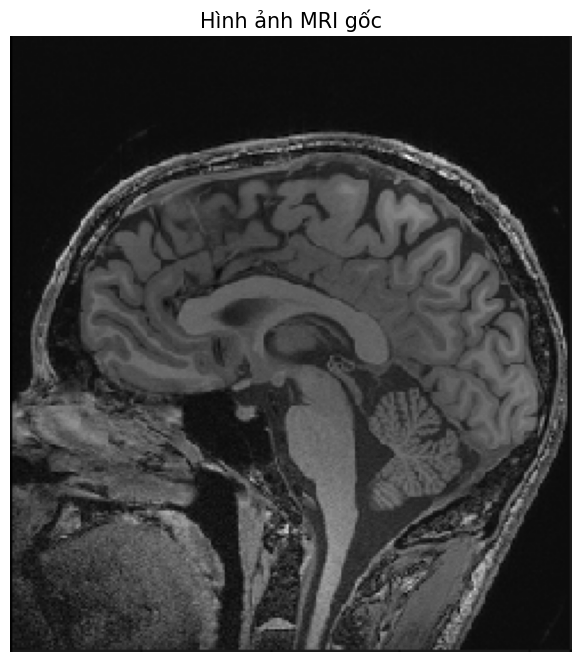

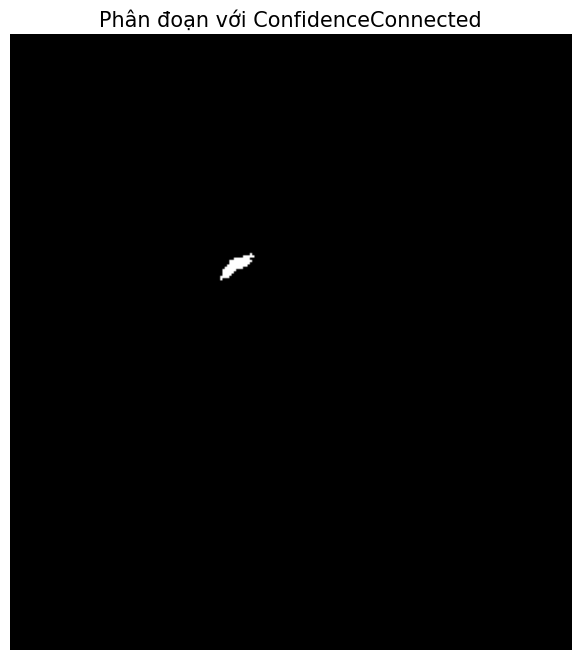

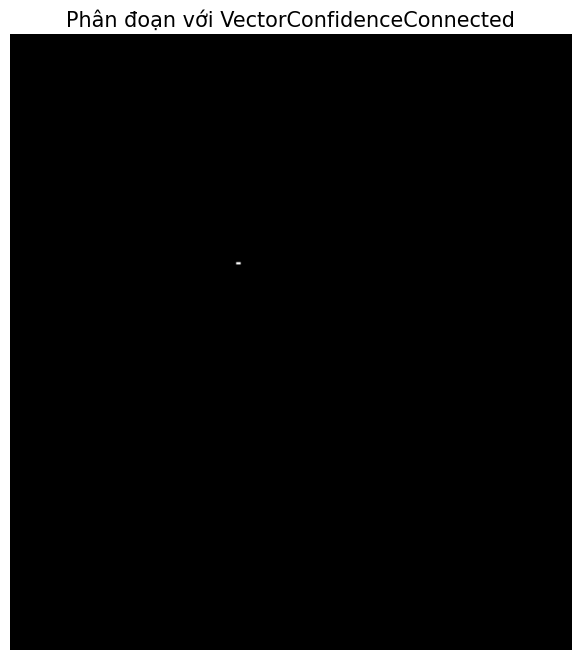

In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
def display_image(image, title="Hình ảnh"):
    """Hàm hỗ trợ hiển thị hình ảnh."""
    plt.figure(figsize=(8, 8))
    plt.imshow(sitk.GetArrayViewFromImage(image), cmap="gray")
    plt.title(title, size=15)
    plt.axis("off")
    plt.show()
mri_image = sitk.ReadImage("../images/mri_T1.png", sitk.sitkFloat32)
display_image(mri_image, "Hình ảnh MRI gốc")
confidence_connected = sitk.ConfidenceConnected(
    image1=mri_image,
    seedList=[(100, 100)],  
    numberOfIterations=5,
    multiplier=2.5,
    initialNeighborhoodRadius=1,
    replaceValue=255,
)
display_image(confidence_connected, "Phân đoạn với ConfidenceConnected")
vector_image = sitk.Compose([mri_image, mri_image, mri_image])
vector_confidence_connected = sitk.VectorConfidenceConnected(
    image1=vector_image,
    seedList=[(100, 100)], 
    numberOfIterations=5,
    multiplier=2.5,
    initialNeighborhoodRadius=1,
    replaceValue=255,
)
display_image(vector_confidence_connected, "Phân đoạn với VectorConfidenceConnected")


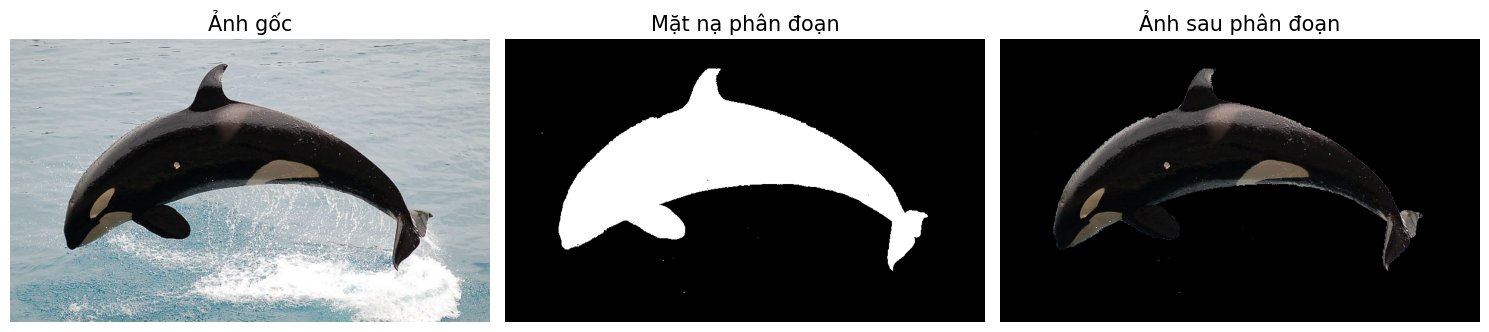

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh cá voi
image = cv2.imread('../images/whale.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển đổi sang RGB để hiển thị với Matplotlib

# Tạo mặt nạ cho GrabCut
mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Xác định hình chữ nhật bao quanh đối tượng chính (cá voi)
rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)  # (x, y, w, h)

# Tạo mảng nền (background) và tiền cảnh (foreground)
bgd_model = np.zeros((1, 65), dtype=np.float64)
fgd_model = np.zeros((1, 65), dtype=np.float64)

# Áp dụng thuật toán GrabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)

# Xử lý mặt nạ để tạo ra ảnh phân đoạn
# Các giá trị 0 và 2 tương ứng với background
# Các giá trị 1 và 3 tương ứng với foreground
segmentation_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Nhân mặt nạ với ảnh gốc để chỉ giữ lại phần foreground
segmented_image = image * segmentation_mask[:, :, np.newaxis]

# Hiển thị kết quả
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Ảnh gốc', size=15)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(segmentation_mask, cmap='gray')
plt.title('Mặt nạ phân đoạn', size=15)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Ảnh sau phân đoạn', size=15)
plt.axis('off')

plt.tight_layout()
plt.show()
